In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os 
import cv2
import random
import pickle
from sklearn.model_selection import train_test_split
from PIL import Image

In [2]:
dest='./data'
Types=['dog','cat']#dog=0, cat=1

In [3]:
for types in Types:
    path=os.path.join(dest,types)
    for img in os.listdir(path):
        img_array =cv2.imread(os.path.join(path,img), cv2.IMREAD_GRAYSCALE)

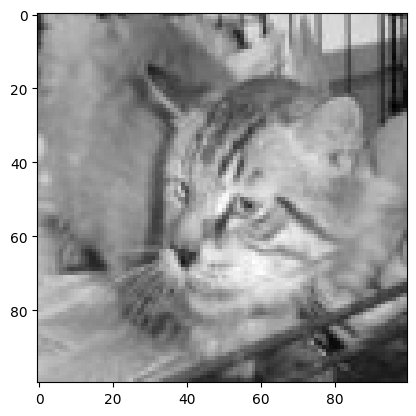

In [4]:
new_array= cv2.resize(img_array, (100, 100))
plt.imshow(new_array, cmap='gray')
plt.show()

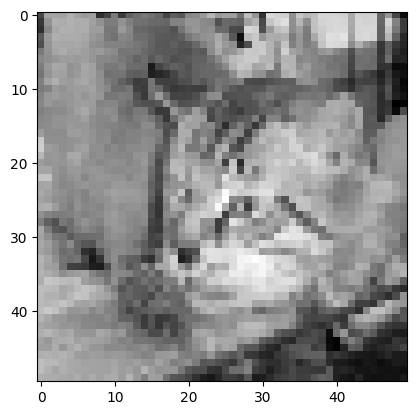

In [5]:
new_array= cv2.resize(img_array, (50, 50))
plt.imshow(new_array, cmap='gray')
plt.show()

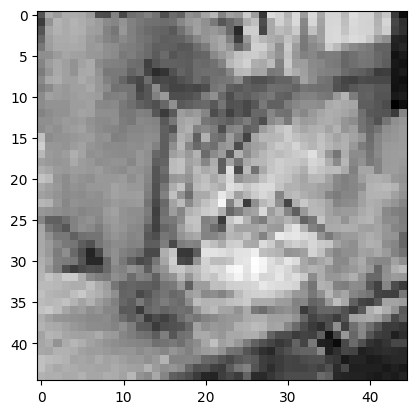

In [6]:
new_array= cv2.resize(img_array, (45, 45))
plt.imshow(new_array, cmap='gray')
plt.show()

I think 50x50 seems like a good size.
See if other images looks goog too.

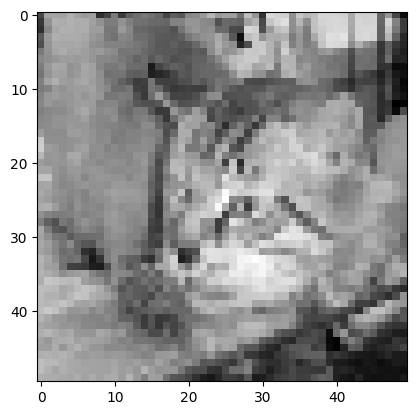

In [7]:
new_array= cv2.resize(img_array, (50, 50))
plt.imshow(new_array, cmap='gray')
plt.show()

Downscaling in some pictures will cause it difficult to see if a picture is cat or dog.
We expect the model with downscaling to be perform worse in accuracy.
But not downscaling the images in CNN could cause overfitting and potentially lead to higher validation loss.

We want to see whether which data input (image) gives the best model

- 1. Original size (128x128) with Greyscale
- 2. Downscale size (50x50) with Greyscale

## 1. Original size (128x128) with Greyscale

45283 45283


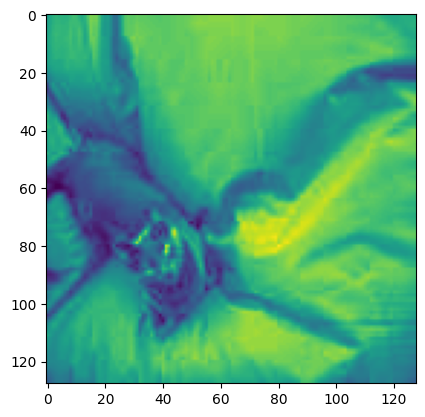

In [8]:
training_data=[]
IMG_SIZE=128
def create_training_data():
    for types in Types:
        path=os.path.join(dest,types)
        class_num=Types.index(types)
        for img in os.listdir(path):
            try:
                img_array =cv2.imread(os.path.join(path,img), cv2.IMREAD_GRAYSCALE)
                new_array=cv2.resize(img_array,(IMG_SIZE,IMG_SIZE))
                training_data.append([new_array,class_num])
            except:
                continue

create_training_data()
random.shuffle(training_data)
X=[]
y=[]

for features, label in training_data:
    X.append(features)
    y.append(label)

X= np.array(X).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
y=np.array(y)
print(len(X),len(y))
plt.imshow(X[0])

In [9]:
print(X[0],y[0])

[[[61]
  [65]
  [69]
  ...
  [67]
  [67]
  [66]]

 [[61]
  [65]
  [69]
  ...
  [68]
  [68]
  [67]]

 [[62]
  [65]
  [69]
  ...
  [68]
  [68]
  [69]]

 ...

 [[39]
  [41]
  [44]
  ...
  [44]
  [42]
  [41]]

 [[36]
  [39]
  [42]
  ...
  [41]
  [40]
  [38]]

 [[35]
  [38]
  [42]
  ...
  [40]
  [38]
  [36]]] 1


In [10]:
pickle_out=open("X_128_G","wb")
pickle.dump(X, pickle_out)
pickle_out.close()

pickle_out=open("y_128_G","wb")
pickle.dump(y, pickle_out)
pickle_out.close()

## 2. Downscale size (50x50) with Greyscale

45283 45283


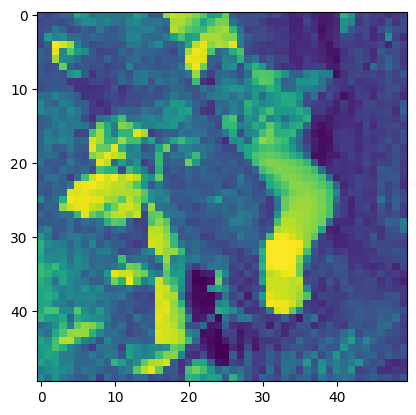

In [11]:
training_data=[]
IMG_SIZE=50
def create_training_data():
    for types in Types:
        path=os.path.join(dest,types)
        class_num=Types.index(types)
        for img in os.listdir(path):
            try:
                img_array =cv2.imread(os.path.join(path,img), cv2.IMREAD_GRAYSCALE)
                new_array=cv2.resize(img_array,(IMG_SIZE,IMG_SIZE))
                training_data.append([new_array,class_num])
            except:
                continue

create_training_data()
random.shuffle(training_data)
X=[]
y=[]

for features, label in training_data:
    X.append(features)
    y.append(label)

X= np.array(X).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
y=np.array(y)
print(len(X),len(y))
plt.imshow(X[0])

In [12]:
print(X[0],y[0])

[[[ 67]
  [ 54]
  [ 68]
  ...
  [ 35]
  [ 45]
  [ 48]]

 [[ 55]
  [ 62]
  [ 64]
  ...
  [ 67]
  [ 40]
  [ 59]]

 [[ 61]
  [ 68]
  [103]
  ...
  [ 82]
  [ 61]
  [ 60]]

 ...

 [[149]
  [130]
  [143]
  ...
  [ 38]
  [ 30]
  [ 38]]

 [[104]
  [126]
  [129]
  ...
  [ 33]
  [ 42]
  [ 40]]

 [[126]
  [ 95]
  [135]
  ...
  [ 67]
  [ 53]
  [ 66]]] 1


In [13]:
pickle_out=open("X_50_G","wb")
pickle.dump(X, pickle_out)
pickle_out.close()

pickle_out=open("y_50_G","wb")
pickle.dump(y, pickle_out)
pickle_out.close()